In [1]:
# Задача: построить классификатор, используя логистическую регрессию

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('ex2data1.txt', header=None, names=['Exam_1', 'Exam_2', 'Admitted'])
# Датасет: 1-й столбец - результат 1-го экзамена, 2-й столбец - 2-го, 3-й - поступил или нет абитуриент

df.info()    # Информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
Exam_1      100 non-null float64
Exam_2      100 non-null float64
Admitted    100 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [3]:
df.head()

,Exam_1,Exam_2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
df.describe()

,Exam_1,Exam_2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


Text(0, 0.5, 'Exam_2 Score')

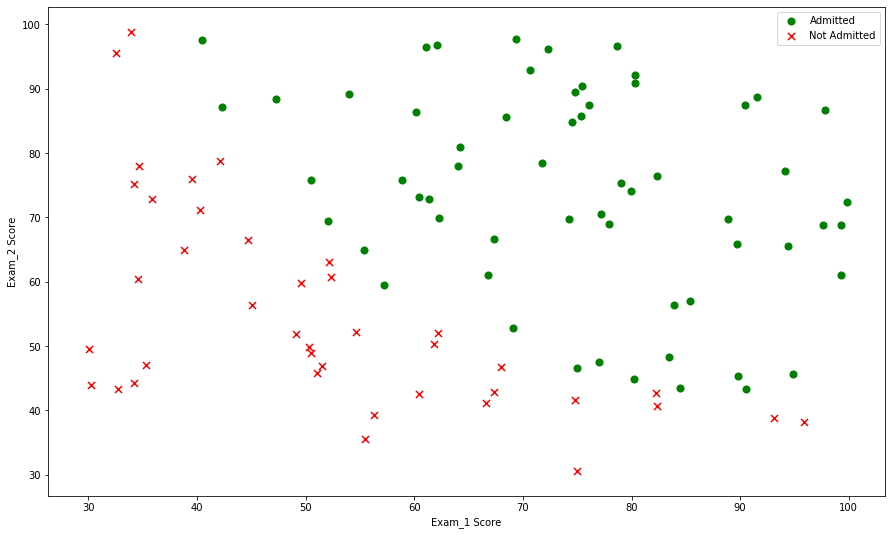

In [5]:
# Визуализируем данные

# isin - Содержится ли каждый элемент датафрейма в указанных значениях
#positive = df[df['Admitted'].isin([1])]
#negative = df[df['Admitted'].isin([0])]

positive = df.query('Admitted == 1')
negative = df.query('Admitted == 0')

fig, ax = plt.subplots(figsize=(15,9))
ax.scatter(positive['Exam_1'], positive['Exam_2'], s=50, color='green', marker='o', label='Admitted')
ax.scatter(negative['Exam_1'], negative['Exam_2'], s=50, color='red', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam_1 Score')
ax.set_ylabel('Exam_2 Score')

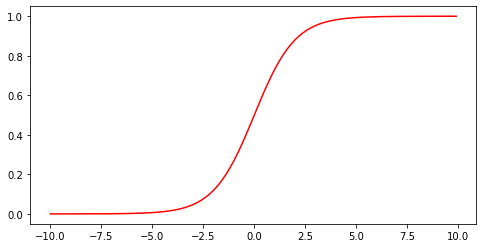

In [6]:
# Реализуем сигмоидную функцию:
def sigmoid(z):
    return 1/ (1 + np.exp(-z))

# Построим ее график:
x = np.arange(-10, 10, step=0.1)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(x, sigmoid(x), 'r')

In [7]:
df.insert(0, 'Ones', 1)    # Вставим столбец из 1
df.head()

,Ones,Exam_1,Exam_2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [8]:
X = df[['Ones', 'Exam_1', 'Exam_2']]
y = df[['Admitted']]

In [9]:
X_matrix = np.matrix(X.values)
y_matrix = np.matrix(y.values)
print(X_matrix.shape)
print(y_matrix.shape)
print(y_matrix.shape[0])

(100, 3)
(100, 1)
100


In [10]:
# Реализуем Cost function для логистической регрессии (без регуляризации):
def cost_function(X, y, theta):
    m = y.shape[0]    # Количество примеров
    h = sigmoid(X.dot(theta))
    
    error = -(np.multiply(y, np.log(h)) + np.multiply((1-y), np.log(1-h)))

    cost = 1/m * sum(error)    # Считаем Cost function
    
    grad = 1/m * (X.T).dot(h - y)    # Считаем dJ/dtheta - вектор производных по тета, размерность (n + 1, 1)
    
    return cost , grad

In [11]:
# Инициализируем вектор Тета 0-ми и посчитаем соответствующие значения Cost function и Градиента:
theta_init = np.zeros((X.shape[1], 1))
print(theta_init)

cost_function(X_matrix, y_matrix, theta_init)

[[0.]
 [0.]
 [0.]]


(matrix([[0.69314718]]), matrix([[ -0.1       ],
         [-12.00921659],
         [-11.26284221]]))

In [12]:
# Реализуем масштабирование признаков (с помощью Mean normalization):
def feature_normalization(X):
    
    X_norm = (X - X.mean())/X.std()
    
    return X_norm

In [13]:
X_norm = feature_normalization(X[['Exam_1', 'Exam_2']])
print(X_norm)
X_norm.insert(0, 'Ones', 1)    # Вставим столбец из 1

X_matrix_norm = np.matrix(X_norm)

      Exam_1    Exam_2
0  -1.594216  0.635141
1  -1.817101 -1.201489
2  -1.531325  0.359483
3  -0.280687  1.080923
4   0.688062  0.490905
..       ...       ...
95  0.917087 -0.960121
96 -1.201681  1.123720
97  1.730412  0.137407
98 -0.529558 -0.069422
99  0.469294  1.254269

[100 rows x 2 columns]


In [14]:
cost_function(X_matrix_norm, y_matrix, theta_init)    
# После нормализации признаков мы получили то же значение Cost function, все ок

(matrix([[0.69314718]]), matrix([[-0.1       ],
         [-0.27981946],
         [-0.24972806]]))

In [15]:
def gradient_descent(X, y, theta, alpha, iterations):
    
    m = y.shape[0]
    cost_history = []    # Записываем значения в архив для построения зависимости Cost_function(iterations)
    
    for i in range(iterations):
        cost, grad = cost_function(X, y, theta)
        theta = theta - (alpha * grad)    # Обновляем значения весов тета
        cost_history.append(float(cost))
    
    return theta , cost_history

iterations_num = 400
alpha = 1
theta, cost_history = gradient_descent(X_matrix_norm, y_matrix, theta_init, alpha, iterations_num)

print('Вектор тета после завершения работы градиентного спуска:',theta)
print('Значение Cost function после завершения работы градиентного спуска:', cost_history[-1])

Вектор тета после завершения работы градиентного спуска: [[1.6582185 ]
 [3.88371249]
 [3.61890756]]
Значение Cost function после завершения работы градиентного спуска: 0.20360510571632445


Text(0.5, 1.0, 'Значение Cost function при соответсвующей итерации')

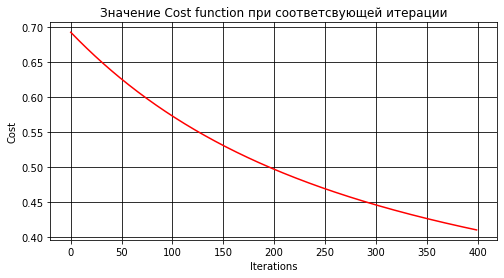

In [16]:
# Построим график зависимости Cost Function от количества итераций при различных скоростях обучения alpha
iterations_num = 400
alpha = 0.01
theta, cost_history = gradient_descent(X_matrix_norm, y_matrix, theta_init, alpha, iterations_num)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.arange(iterations_num), cost_history, 'r')
ax.grid(color='black')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Значение Cost function при соответсвующей итерации')

Text(0.5, 1.0, 'Значение Cost function при соответсвующей итерации')

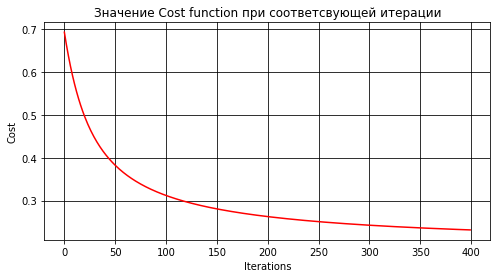

In [17]:
# Построим график зависимости Cost Function от количества итераций при различных скоростях обучения alpha
iterations_num = 400
alpha = 0.1
theta, cost_history = gradient_descent(X_matrix_norm, y_matrix, theta_init, alpha, iterations_num)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.arange(iterations_num), cost_history, 'r')
ax.grid(color='black')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Значение Cost function при соответсвующей итерации')

[[1.6582185 ]
 [3.88371249]
 [3.61890756]]


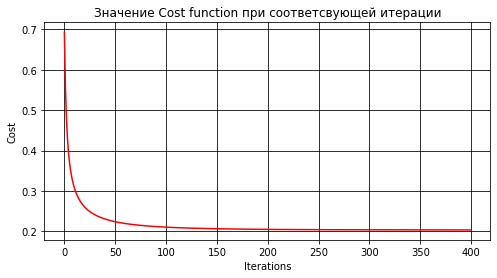

In [18]:
# Построим график зависимости Cost Function от количества итераций при различных скоростях обучения alpha
iterations_num = 400
alpha = 1
theta, cost_history = gradient_descent(X_matrix_norm, y_matrix, theta_init, alpha, iterations_num)

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(np.arange(iterations_num), cost_history, 'r')
ax.grid(color='black')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Значение Cost function при соответсвующей итерации')

print(theta)

In [19]:
# Будем предсказывать значения y_pred с помощью нашего классификатора
def predict(X, theta):

    h = (np.array(sigmoid(X.dot(theta))))
    
    y_pred = []
    for i in range(len(h)):
        if h[i] >= 0.5:
            y_pred.append(1)
        elif h[i] < 0.5:
            y_pred.append(0)
    
    return y_pred, h


y_pred, probability = predict(X_matrix_norm, theta)

y_true = y['Admitted']
m = len(y_true)
m_true = 0

for i in range(m):
    if y_pred[i] == y_true[i]:
        m_true = m_true + 1
    else:
        pass
    
accuracy = (m_true/m) * 100
print('Точность на тренировочном датасете:', accuracy, '%')

Точность на тренировочном датасете: 89.0 %


In [20]:
# Класс, предсказанный нашей моделью для примеров 1 и 50
print(y_pred[1])
print(y_pred[50])

# Вероятность для примеров 1 и 50 принадлежать к классу "1"
print(probability[1])
print(probability[50])

0
1
[5.84689126e-05]
[0.99766869]


In [21]:
# Воспользуемся баблиотекой SciKit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

X = df[['Exam_1', 'Exam_2']]
y = df.Admitted

X, y = shuffle(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

clf = LogisticRegression(n_jobs=-1, solver='lbfgs')
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'max_iter': [100, 200, 300, 400]}
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)
grid_search_cv_clf.fit(X_train, y_train)

C:\Users\pavel.molchanov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'max_iter': [100, 200, 300, 400]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [22]:
grid_search_cv_clf.best_params_

{'C': 0.001, 'max_iter': 100}

In [23]:
best_clf = grid_search_cv_clf.best_estimator_

In [24]:
best_clf

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
print(best_clf.score(X_train, y_train))    # accuracy на тренировочном датасете
print(best_clf.score(X_test, y_test))    # accuracy на тестовом датасете

0.9253731343283582
0.8484848484848485


In [26]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_pred = best_clf.predict(X_test)    # предсказанные значения

print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred))

0.8571428571428571
0.9


In [27]:
probability = best_clf.predict_proba(X_test)    # Вероятность отнесения примера к классу "0" и к классу "1"
probability[0][0] + probability[0][1]

1.0

In [28]:
# Задание 2.

df_2 = pd.read_csv('ex2data2.txt', header=None, names=['Test_1', 'Test_2', 'Class'])
# Датасет: 1-й столбец - результат 1-го экзамена, 2-й столбец - 2-го, 3-й - поступил или нет абитуриент

df_2.info()    # Информация о датасете

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 118 entries, 0 to 117
Data columns (total 3 columns):
Test_1    118 non-null float64
Test_2    118 non-null float64
Class     118 non-null int64
dtypes: float64(2), int64(1)
memory usage: 2.9 KB


In [29]:
df_2.head()

,Test_1,Test_2,Class
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


In [30]:
df_2.describe()

,Test_1,Test_2,Class
count,118.000000,118.000000,118.000000
mean,0.054779,0.183102,0.491525
std,0.496654,0.519743,0.502060
min,-0.830070,-0.769740,0.000000
25%,-0.372120,-0.254385,0.000000
50%,-0.006336,0.213455,0.000000
75%,0.478970,0.646562,1.000000
max,1.070900,1.108900,1.000000


Text(0, 0.5, 'Test_2')

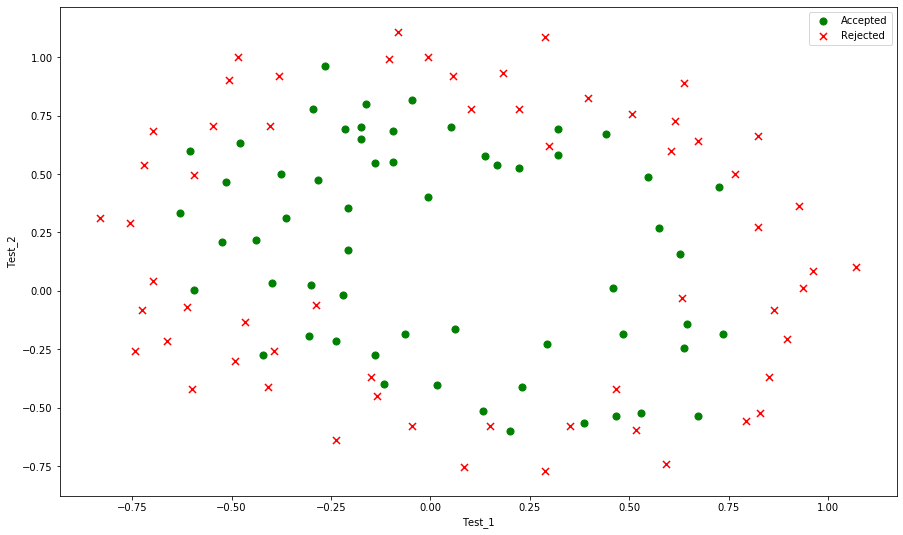

In [31]:
# Визуализируем данные, в данной задаче граница, разделяющая классы, нелинейная
positive = df_2.query('Class == 1')
negative = df_2.query('Class == 0')

fig, ax = plt.subplots(figsize=(15,9))
ax.scatter(positive['Test_1'], positive['Test_2'], s=50, color='green', marker='o', label='Accepted')
ax.scatter(negative['Test_1'], negative['Test_2'], s=50, color='red', marker='x', label='Rejected')
ax.legend()
ax.set_xlabel('Test_1')
ax.set_ylabel('Test_2')

In [32]:
# Воспользуемся баблиотекой SciKit Learn
from sklearn.linear_model import LogisticRegression
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

X = df_2[['Test_1', 'Test_2']]
y = df_2.Class

In [33]:
poly = PolynomialFeatures(2)    # Максимальная степень создаваемых нами полиномиальных признаков
X_poly = poly.fit_transform(X)

clf = LogisticRegression(n_jobs=-1, solver='lbfgs')
parameters = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000], 'max_iter': [100, 200, 300, 400]}
grid_search_cv_clf = GridSearchCV(clf, parameters, cv=5)
grid_search_cv_clf.fit(X_poly, y)

C:\Users\pavel.molchanov\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=-1, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000,
                               10000],
                         'max_iter': [100, 200, 300, 400]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [34]:
grid_search_cv_clf.best_params_

{'C': 100, 'max_iter': 100}

In [35]:
best_clf = grid_search_cv_clf.best_estimator_

In [36]:
best_clf

LogisticRegression(C=100, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [37]:
print(best_clf.score(X_poly, y))    # accuracy на тренировочном датасете

0.8559322033898306


In [38]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

y_pred = best_clf.predict(X_poly)    # предсказанные значения

print(precision_score(y, y_pred))
print(recall_score(y, y_pred))

0.847457627118644
0.8620689655172413


In [39]:
y_pred = pd.DataFrame(y_pred, columns=['Class_pred'])

In [40]:
df_pred = pd.concat([df_2, y_pred], axis=1)

In [41]:
df_pred    # Датасет с истинными и предсказанными классами

,Test_1,Test_2,Class,Class_pred
0,0.051267,0.699560,1,1
1,-0.092742,0.684940,1,1
2,-0.213710,0.692250,1,1
3,-0.375000,0.502190,1,1
4,-0.513250,0.465640,1,1
...,...,...,...,...
113,-0.720620,0.538740,0,0
114,-0.593890,0.494880,0,1
115,-0.484450,0.999270,0,0
116,-0.006336,0.999270,0,0
